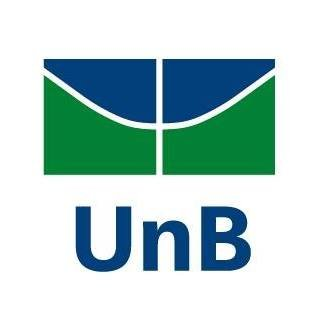

# Tarefa 1 - Distribuições de Probabilidade

## Determinando o risco/retorno de um carteira 60% em ações e 40% em FIIs usando simulação de Monte Carlo aplicando uma distribuição normal.

#### Um analista de dados precisa determinar a probabilidade de ganho de uma carteira composta por 60% de ações e 40% de FIIs em 1 ano. A carteira tem um valor inicial de 1.000.000. Assume-se que a carteira de ações é composta pelas ações VALE3, TAEE11, PETR4, BBAS3 e BBSE3, que têm um retorno anual seguindo uma distribuição normal com média de 8% e desvio padrão de 15%. Assim como, a carteira de FIIs é composta pelos FIIs MXRF11, XPCA11, HGLG11 e KNCR11, que têm um retorno anual seguindo uma distribuição normal com média de 4% e desvio padrão de 5%.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [69]:
num_iterations = 10000 # Numero para simulação de Monte Carlos
valor_inicial_carteira_total = 1000000  # $1,000,000
porcentagem_acoes = 0.6
porcentagem_fiis = 0.4
media_retorno_acoes = 0.08 # anual
std_dev_acoes = 0.15
media_retorno_fiis = 0.04 # anual
std_dev_fiis = 0.06

In [70]:
# criando um vetor para armazenar os valores das simulações
valores_carteira = np.zeros(num_iterations)
interarion = np.zeros(num_iterations)

Modelo de retorno simples combinando as carteiras e o valor inicial para cada simulação
$$ 
    (1 + porcentagem_{acoes} * retorno_{acoes} + porcentagem_{fiis} * retorno_{fiis}) * valor_{inicial}
$$

In [71]:
def f_calcular_retorno_carteira_total(retorno_acoes, retorno_fiis, valor_inicial_carteira_total=valor_inicial_carteira_total, porcentagem_acoes=0.6, porcentagem_fiis = 0.4):
    return (1 + porcentagem_acoes * retorno_acoes + porcentagem_fiis * retorno_fiis) * valor_inicial_carteira_total
    

In [72]:
# Run Monte Carlo simulation
for i in range(num_iterations):
    retorno_fiis  = np.random.normal(media_retorno_fiis, std_dev_fiis)
    retorno_acoes = np.random.normal(media_retorno_acoes, std_dev_acoes)
    
    valor_futuro = f_calcular_retorno_carteira_total(retorno_acoes, retorno_fiis)
    
    valores_carteira[i] = valor_futuro
    interarion[i] = i

### Resultado média de valor final e desvio padrão das simulações 

In [73]:
# Analyze the results
media_valores_carteira   = np.mean(valores_carteira)
std_dev_valores_carteira = np.std(valores_carteira)

print("Média do valor final da carteira: ${:,.2f}".format(media_valores_carteira))
print("Standard Deviation: ${:,.2f}".format(std_dev_valores_carteira))

Média do valor final da carteira: $1,064,427.22
Standard Deviation: $93,992.70


#### Plotando as simulações

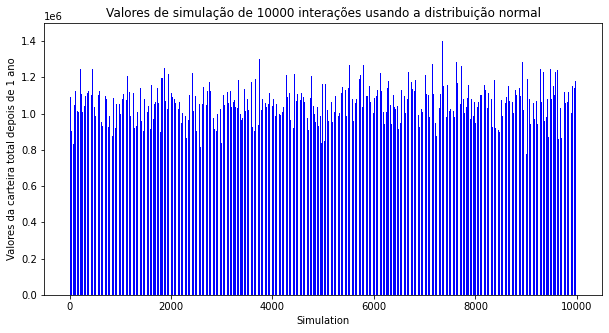

In [74]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(interarion, valores_carteira, color ='blue',
        width = 0.6)
 
plt.xlabel("Simulation")
plt.ylabel("Valores da carteira total depois de 1 ano")
plt.title("Valores de simulação de 10000 interações usando a distribuição normal")
plt.show()

#### O gestor do analista de dados entrevistou o cliente para entender suas expectativas de retorno. O cliente esperava alcançar um retorno entre 1,2 milhão e 1,4 milhão de reais com a carteira de investimentos. Dessa forma, o gestor solicitou ao analista a probabilidade de alcançar essa expectativa.

In [75]:
limite_inf = 1200000
limite_sup = 1400000

p_ub = round(norm.cdf(limite_sup, media_valores_carteira, std_dev_valores_carteira), 4)
p_lb = round(norm.cdf(limite_inf, media_valores_carteira, std_dev_valores_carteira), 4)

area = norm.cdf(limite_sup, media_valores_carteira, std_dev_valores_carteira) - norm.cdf(limite_inf, media_valores_carteira, std_dev_valores_carteira)

result = round(area, 4) * 100

print("A Probabilidade é:", result, "%")

A Probabilidade é: 7.4399999999999995 %


### Plotando a probabilidade

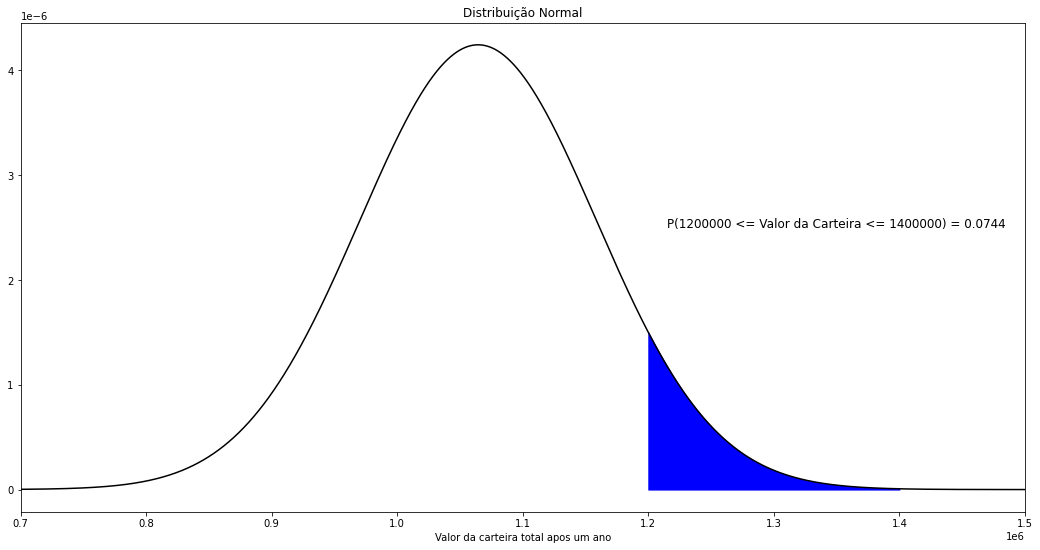

In [76]:
result = "P(" + str(limite_inf) + " <= Valor da Carteira <= " + str(limite_sup) + ") = " + str(round(area, 4))

x = np.linspace(700000, 1500000, 100000)
hx = norm.pdf(x, media_valores_carteira, std_dev_valores_carteira)

i = (x >= limite_inf) & (x <= limite_sup)

fig, ax = plt.subplots(figsize=(18, 9))

ax.plot(x, hx, 'k', linewidth=1.5)
ax.fill_between(x, hx, 0, where=i, color='blue', alpha=1)
ax.set_xlim([700000, 1500000])
#ax.set_ylim([0, 0.90])
ax.set_xlabel("Valor da carteira total apos um ano")
ax.set_title("Distribuição Normal")
ax.text(1350000, 0.0000025, result, ha='center', fontsize=12)
#ax.set_xticks(np.arange(40, 161, 20))

plt.show()

### Conclusão

#### O gestor concluiu que essa divisão de carteira não é apropriada para as expectativas que o cliente possui para os retornos de investimentos depois de 1 ano, provavelmente fazer uma composição com ativos com mais retorno porem com mais risco. Assim o gestor fez a solicitação para uma carteira com mais risco porem com mais retorno.